In [1]:
import os
import torch
import torch.nn.functional as F
import argparse
import time

from torch.optim.lr_scheduler import StepLR
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms

import numpy as np

# from utils.dataLoader import LandmarksDataset, ToTensorSegLH, Rescale, RandomScale, AugColor, Rotate, ToTensorSeg1

from models.unet import UNet, DiceLoss
from torch.nn import CrossEntropyLoss

from medpy.metric.binary import dc

In [2]:

from utils.graphDataLoader import LandmarksDataset, ToTensorSegHeart


In [3]:
# train_path = "../../generateData/data/noisytrain"
# val_path = "../../generateData/data/noisyval"

train_path = "Datasets/JSRT/Train"
val_path = "Datasets/JSRT/Val" 
img_path = os.path.join(train_path, 'Images')
label_path = os.path.join(train_path, 'landmarks')

train_dataset = LandmarksDataset(img_path=img_path,
                                    label_path=label_path,
                                    transform = transforms.Compose([
                                                # RandomScale(),
                                                # Rotate(3),
                                                # AugColor(0.40),
                                                ToTensorSegHeart()])
                                    )

Total of landmarks: 174


torch.Size([1, 1024, 1024])
torch.float32


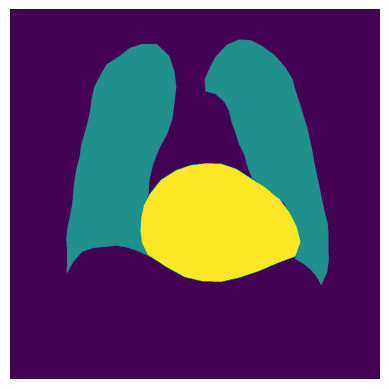

Min: tensor(0.)
Max: tensor(2.)


In [5]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 10, shuffle = True, num_workers = 0)
image = train_dataset[0]['seg']
print(image.shape)
print(image.dtype)
import matplotlib.pyplot as plt 
import numpy as np


plt.imshow(image[0])
plt.axis('off')
plt.show()
print('Min:', image.min())
print('Max:', image.max())

In [5]:
from utils.smileyDataLoader import LandmarksDataset, ToTensorSeg, ToTensorSegLH, Rescale, RandomScale, AugColor, Rotate, ToTensorSeg1, ToTensor

train_path = "../../generateData/unetdata/noisytrain"
val_path = "../../generateData/unetdata/noisyval"


img_path = os.path.join(train_path, 'Images')
label_path = os.path.join(train_path, 'landmarks')
# train_dataset = LandmarksDataset(img_path=img_path,
#                                     label_path=label_path,
#                                     transform = transforms.Compose([
#                                                 #RandomScale(),
#                                                 Rotate(3),
#                                                 #AugColor(0),
#                                                 # Rescale([320,256]),
#                                                 ToTensorSegLH()])
#                                     )

train_dataset = LandmarksDataset(img_path=img_path,
                                    label_path=label_path,
                                    transform = transforms.Compose([
                                                RandomScale(),
                                                Rotate(3),
                                                AugColor(0.40),
                                                ToTensorSegLH()])
                                    )
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 10, shuffle = True, num_workers = 0)


Total of landmarks: 70


torch.Size([320, 256])


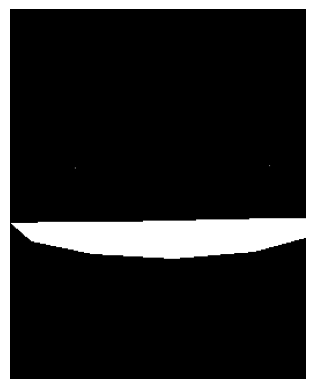

In [6]:
import matplotlib.pyplot as plt 
import numpy as np

image = train_dataset[0]['seg']
print(image.shape)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


Total of landmarks: 70
torch.Size([1, 320, 256])
torch.float32
torch.Size([24, 2])


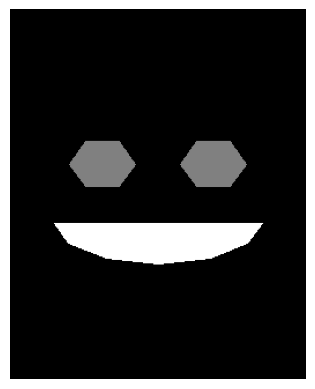

Min: tensor(0.)
Max: tensor(2.)


In [11]:
from utils.smileyGraphDataLoaderMoreEyes import LandmarksDataset, ToTensorSegHeart

train_path = "../../generateData/Eyedata/noisytrain"
val_path = "../../generateData/Eyedata/noisyval"


img_path = os.path.join(train_path, 'Images')
label_path = os.path.join(train_path, 'landmarks')
train_dataset = LandmarksDataset(img_path=img_path,
                                 label_path=label_path,
                                 transform = transforms.Compose([
                                             ToTensorSegHeart()])
                                 )


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 10, shuffle = True, num_workers = 0)
image = train_dataset[0]['seg']
print(image.shape)
print(image.dtype)
import matplotlib.pyplot as plt 
import numpy as np
landmark = train_dataset[0]['landmarks']
print(landmark.shape)

plt.imshow(image[0], cmap='gray')
plt.axis('off')
plt.show()
print('Min:', image.min())
print('Max:', image.max())